# EDA - Bike Share System in the SF Bay Area

Author: Owen Hsu 

## Table of content

1. Loading and Setup
2. Assessment
3. EDA

In this notebook, we will further examine the dataset and visualize the results (EDA).

## Loading and Setup

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

/Users/chih-kanghsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the dataset
df = pd.read_parquet('data/BikeData_after_DataCleaning.parquet')

## Assessment

In [4]:
# Print the shape of the data
df.shape

(7337194, 15)

In [5]:
# Look at the first 5 rows
df.head()

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code
0,2014-05-01 00:00:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
1,2014-05-01 00:05:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
2,2014-05-01 00:10:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
3,2014-05-01 00:15:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
4,2014-05-01 00:20:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113


In [6]:
# Get a quick overview of dataset variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337194 entries, 0 to 7337193
Data columns (total 15 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   station_id                      int64         
 2   bikes_available                 int64         
 3   docks_available                 int64         
 4   dock_count                      int64         
 5   date                            datetime64[ns]
 6   mean_temperature_f              float64       
 7   mean_dew_point_f                float64       
 8   mean_humidity                   float64       
 9   mean_sea_level_pressure_inches  float64       
 10  mean_visibility_miles           float64       
 11  mean_wind_speed_mph             float64       
 12  precipitation_inches            int64         
 13  cloud_cover                     float64       
 14  zip_code                        int64         
dty

In [7]:
# Sanity check to make sure we don't have any NAs
df.isna().sum()

time                              0
station_id                        0
bikes_available                   0
docks_available                   0
dock_count                        0
date                              0
mean_temperature_f                0
mean_dew_point_f                  0
mean_humidity                     0
mean_sea_level_pressure_inches    0
mean_visibility_miles             0
mean_wind_speed_mph               0
precipitation_inches              0
cloud_cover                       0
zip_code                          0
dtype: int64

**Methodology:**

The information provided is a summary of a pandas DataFrame with 7,337,194 rows and 15 columns. The DataFrame has undergone data filtering and cleaning, and the output represents the current state of the DataFrame after these operations.

1. Data filtering and cleaning: The initial DataFrame had 71,984,434 rows, but some rows were removed during data filtering and cleaning, resulting in the DataFrame now containing 7,337,194 rows.
2. Columns and Data Types: The DataFrame contains 15 columns, with 13 columns having a numerical data type (5 int64 and 12 float64) and 2 columns having a date data type (datetime64). The numerical columns likely represent continuous or discrete numeric features, while the datetime columns may contain date and time data.
3. Calculation of missing values: For each column, the sanity check shows the total number of missing values. This information indicates that there are no missing values in any of the 15 columns.
<br />

**Findings:**

1. The DataFrame has been filtered and cleaned to contain 7,337,194 rows out of the original 71,984,434 rows.
2. The DataFrame contains 15 columns, consisting of 13 numerical columns and 2 datetime columns.
3. There are no missing values in any of the columns.

In [8]:
# Get a statistical summary of the dataset
df.describe()

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code
count,7337194,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7337194,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06
mean,2014-10-30 13:33:29.071412224,4.299356e+01,8.296316e+00,9.359660e+00,1.765689e+01,2014-10-30 01:35:59.101914112,6.154861e+01,4.968303e+01,6.859634e+01,3.001985e+01,9.598144e+00,6.647163e+00,1.599805e-01,3.262926e+00,9.433987e+04
min,2014-05-01 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,2014-05-01 00:00:00,4.100000e+01,1.300000e+01,2.400000e+01,2.963000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.404100e+04
25%,2014-07-31 01:55:00,2.400000e+01,5.000000e+00,6.000000e+00,1.500000e+01,2014-07-31 00:00:00,5.700000e+01,4.600000e+01,6.300000e+01,2.993000e+01,1.000000e+01,4.000000e+00,0.000000e+00,1.000000e+00,9.410700e+04
50%,2014-10-30 20:45:00,4.200000e+01,8.000000e+00,9.000000e+00,1.500000e+01,2014-10-30 00:00:00,6.200000e+01,5.000000e+01,6.900000e+01,3.000000e+01,1.000000e+01,6.000000e+00,0.000000e+00,3.000000e+00,9.410700e+04
75%,2015-01-29 20:30:00,6.400000e+01,1.100000e+01,1.200000e+01,1.900000e+01,2015-01-29 00:00:00,6.700000e+01,5.500000e+01,7.500000e+01,3.011000e+01,1.000000e+01,9.000000e+00,0.000000e+00,5.000000e+00,9.430100e+04
max,2015-04-30 23:55:00,8.400000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2015-04-30 00:00:00,8.400000e+01,6.500000e+01,9.600000e+01,3.041000e+01,2.000000e+01,2.300000e+01,1.000000e+00,8.000000e+00,9.511300e+04
std,NaN,2.399402e+01,4.173161e+00,4.229201e+00,3.982221e+00,NaN,6.557668e+00,6.848807e+00,1.073235e+01,1.291384e-01,1.313508e+00,3.303102e+00,3.665880e-01,2.229327e+00,4.248337e+02


## EDA

Let's prints the unique values present in the 'dock_count' column, which represents the different toatl dock numbers in the dataset:

In [9]:
# Check the dock count in each bike station
df.groupby('station_id')['dock_count'].mean().astype(int).value_counts()

dock_count
15    34
19    18
23     9
27     4
11     4
25     1
Name: count, dtype: int64

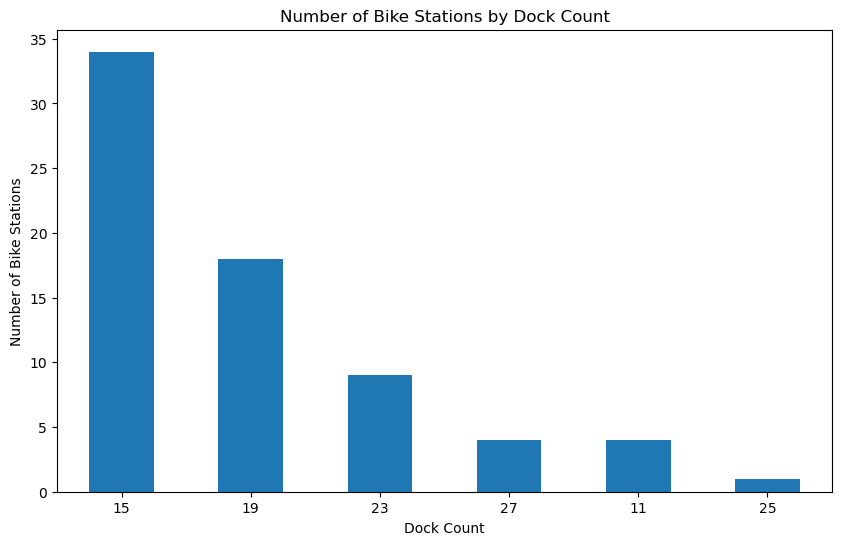

In [10]:
# Create the plot to show the number of bike stations for each dock count
plt.figure(figsize=(10, 6))
df.groupby('station_id')['dock_count'].mean().astype(int).value_counts().plot(kind='bar')
plt.xlabel('Dock Count')
plt.ylabel('Number of Bike Stations')
plt.title('Number of Bike Stations by Dock Count')
plt.xticks(rotation=0)  
plt.show()

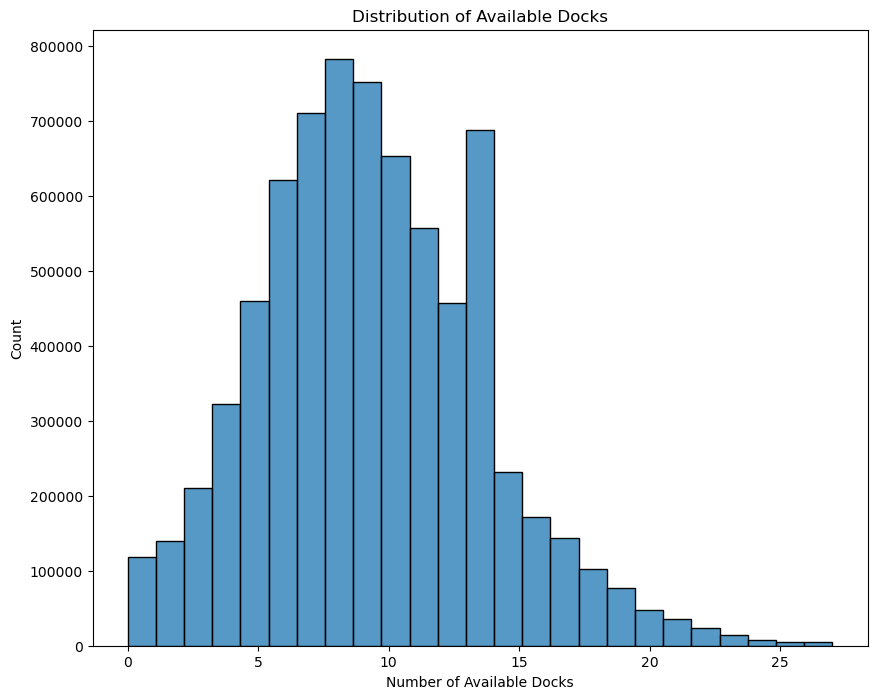

In [11]:
# Plot a histogram of docks_available
plt.figure(figsize=(10, 8))
sns.histplot(df['docks_available'], bins=25)
plt.xlabel('Number of Available Docks')
plt.ylabel('Count')
plt.title('Distribution of Available Docks')
plt.show()

The histogram shows the distribution of number of available docks in the dataset. Most of the number of available docks are ranging from 5 to 13.

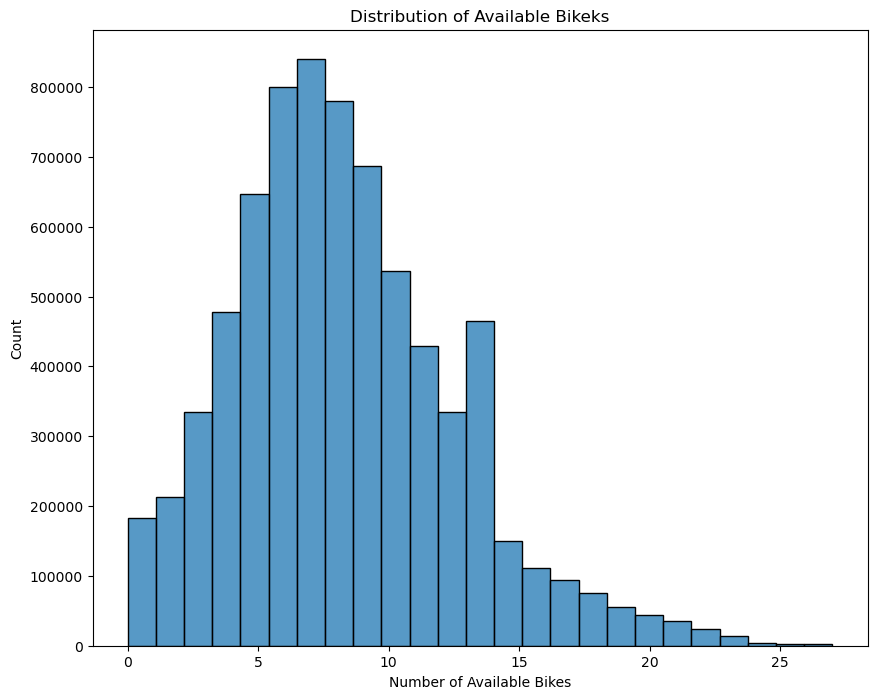

In [12]:
# Plot a histogram of bikes_available
plt.figure(figsize=(10, 8))
sns.histplot(df['bikes_available'], bins=25)
plt.xlabel('Number of Available Bikes')
plt.ylabel('Count')
plt.title('Distribution of Available Bikeks')
plt.show()

The histogram shows the distribution of number of available bikes in the dataset. Most of the number of available bikes are ranging from 5 to 12.

We will create a new column 'usage_rate' by dividing 'docks_available' by 'dock_count' in the DataFrame. A higher value represents more people are renting bikes from the station. Thus, there are fewer available bikes and more available docks.

In [13]:
# Create 'usage_rate' columns in df
df['usage_rate'] = df['docks_available'] / df['dock_count'] * 100

In [14]:
# Check all distinct values of usage_rate
df['usage_rate'].value_counts()

usage_rate
53.333333     529849
60.000000     489113
46.666667     475596
40.000000     394533
66.666667     392123
               ...  
96.000000        502
16.000000        454
12.000000        396
104.000000       289
8.000000         225
Name: count, Length: 110, dtype: int64

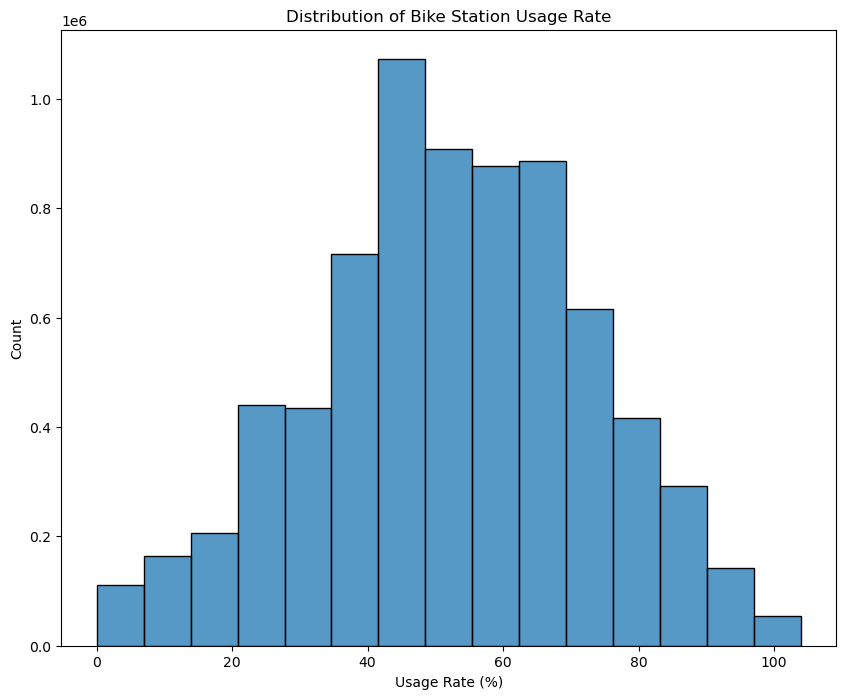

In [15]:
# Create a hist plot to check the distribution in 'usage_rate' column
plt.figure(figsize=(10, 8))
sns.histplot(df['usage_rate'], bins=15)
plt.xlabel('Usage Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Bike Station Usage Rate')
plt.show()

Based on the 'usage_rate', we will create a new column called 'usage_rate_category' in the DataFrame (df) to categorize the usage rate according to the following rules:
- Usage Rate >= 70 : High 
- Usage Rate < 70 & Usage Rate > 30: Median 
- Usage Rate <= 30 : Low 

In [16]:
# Define the conditions and corresponding values
conditions = [
    (df['usage_rate'] >= 70),
    (df['usage_rate'] < 70) & (df['usage_rate'] > 30),
    (df['usage_rate'] <= 30)
]
values = ['High', 'Median', 'Low']

# Create the 'usage_rate_category' column based on the conditions
df['usage_rate_category'] = np.select(conditions, values, default=np.nan)

In [17]:
# Check all distinct values of usage_rate_category
df['usage_rate_category'].value_counts()

usage_rate_category
Median    4928851
High      1465943
Low        942400
Name: count, dtype: int64

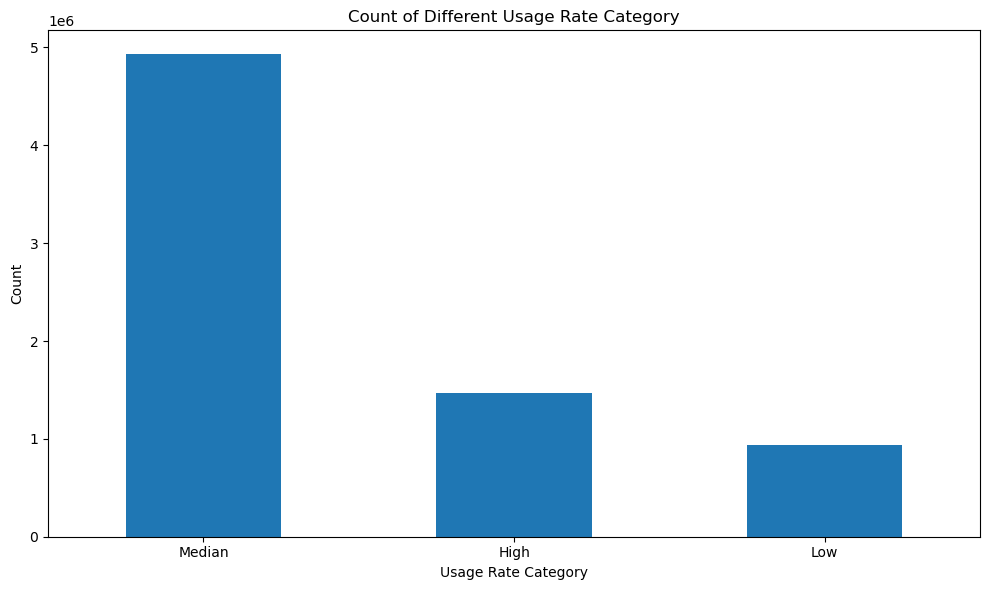

In [18]:
# Create a bar plot for the count of each unique value in 'usage_rate_category' column
plt.figure(figsize=(10, 6))
df['usage_rate_category'].value_counts().plot(kind='bar')
plt.xlabel('Usage Rate Category')
plt.ylabel('Count')
plt.title('Count of Different Usage Rate Category')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

The bar plot visually represents the distribution of bike station's usage rate status, showing the count of usage rate in each category. This plot provides an overview of the bike station's usage rate status distribution in the dataset.

In [19]:
# Get the percentage of each unique value in 'usage_rate_category' column
df['usage_rate_category'].value_counts() / len(df) * 100

usage_rate_category
Median    67.176239
High      19.979613
Low       12.844147
Name: count, dtype: float64

In our dataset, 67.1% of the usage rate is categorized as median, 19.9% as high, and 12.8% as low.

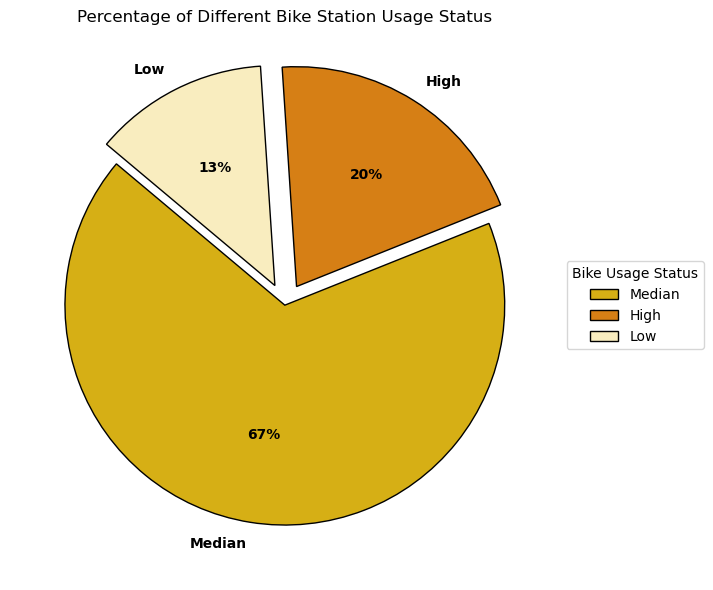

In [20]:
# Plot a Pie chart to show the percentage of each unique value in 'usage_rate_category' column
plt.figure(figsize=(10, 6))
usage_status_counts = df['usage_rate_category'].value_counts()
colors = ['#d6af15', '#d67f15', '#f9edbf']
explode = [0, 0.1, 0.1]  # To create a slight separation between slices

# Plot the pie chart with legend, rounded percentages, and black outline
plt.pie(usage_status_counts, labels=usage_status_counts.index,autopct='%1.0f%%', colors=colors, startangle=140, explode=explode,
        wedgeprops={'edgecolor': 'black'}, textprops={'weight': 'bold'})

plt.legend(title='Bike Usage Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of Different Bike Station Usage Status')
plt.tight_layout()
plt.show()

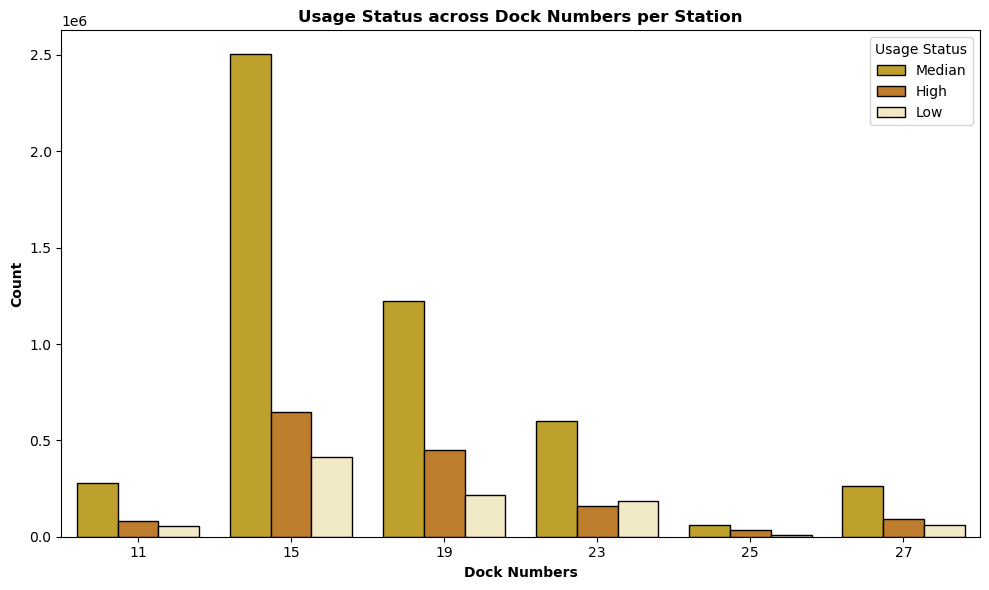

In [21]:
# Define the custom color palette to match the pie chart and histogram colors
color = ['#d6af15', '#d67f15', '#f9edbf']

# Countplot per grade with matching colors and dock_order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dock_count', hue='usage_rate_category', palette=color,
              edgecolor='black')

plt.xlabel('Dock Numbers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Usage Status across Dock Numbers per Station', fontweight='bold')
plt.legend(title='Usage Status', loc='upper right')

plt.tight_layout()
plt.show()

The lower the dock number of the station, the more likely it is to have either a higher or lower usage rate. This is expected, as smaller bike stations' usage rates are more sensitive to the available bike and dock numbers.

Based on our common knowledge, the usage rate of bike sharing appears to be influenced by whether it is a weekday, weekend, or holiday. Consequently, we have decided to further categorize our 'time' column to facilitate more detailed analysis.

* 'weekend' features: Create a binary feature indicating whether a day is a weekend or not.
* 'holiday' features: Create a binary feature indicating whether a day is a holiday or not.
* 'is_weekend_or_holiday' features: Create a binary feature indicating whether a day is a weekend/Holiday or not.
* 'hour' features: Create a numeric feature indicating the hour of the recorded time. 

In [22]:
# Install the holidays library
!pip install holidays

In [23]:
import datetime
import holidays

# Define the country for the holidays
us_holidays = holidays.US()

# Create a new DataFrame with modified 'weekend', 'holiday', and 'is_weekend_or_holiday' columns
df_modified = df.copy()

# Define functions to check weekends
def is_weekend(date):
    return date.weekday() >= 5  # 0 is Monday, 5 is Saturday, 6 is Sunday

# Define functions to check holidays
def is_holiday(date):
    return date in us_holidays


# Apply functions to DataFrame and cast the boolean values to integers
df_modified['weekend'] = df['time'].apply(is_weekend).astype(int)
df_modified['holiday'] = df['time'].apply(is_holiday).astype(int)
df_modified['is_weekend_or_holiday'] = df_modified['weekend'] | df_modified['holiday'].astype(int)

In [24]:
# Look at random 10 rows
df_modified.sample(10)

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code,usage_rate,usage_rate_category,weekend,holiday,is_weekend_or_holiday
3251073,2014-07-13 03:40:00,35,7,4,11,2014-07-13,67.0,59.0,75.0,29.98,14.0,10.0,0,5.0,94301,36.363636,Median,1,0,1
4169841,2014-06-19 20:40:00,69,21,2,23,2014-06-19,61.0,50.0,70.0,29.98,10.0,9.0,0,2.0,94107,8.695652,Low,0,0,0
4761638,2014-08-17 03:35:00,61,12,15,27,2014-08-17,65.0,55.0,73.0,30.00,10.0,10.0,0,5.0,94107,55.555556,Median,1,0,1
6095729,2014-12-28 06:10:00,67,7,20,27,2014-12-28,47.0,41.0,75.0,30.29,10.0,4.0,0,3.0,94107,74.074074,High,1,0,1
5047145,2014-09-14 11:35:00,74,17,6,23,2014-09-14,67.0,56.0,69.0,29.84,10.0,8.0,0,2.0,94107,26.086957,Low,1,0,1
935780,2014-11-20 00:40:00,80,3,12,15,2014-11-20,55.0,53.0,93.0,30.07,9.0,4.0,1,6.0,95113,80.000000,High,0,0,0
6045342,2014-12-23 07:15:00,67,4,23,27,2014-12-23,56.0,51.0,84.0,30.17,9.0,3.0,0,0.0,94107,85.185185,High,0,0,0
3959483,2014-05-29 09:15:00,72,15,8,23,2014-05-29,64.0,47.0,55.0,29.94,10.0,8.0,0,1.0,94107,34.782609,Median,0,0,0
1930766,2014-09-03 01:35:00,25,5,10,15,2014-09-03,70.0,56.0,74.0,29.76,10.0,4.0,0,5.0,94063,66.666667,Median,0,0,0
1996579,2014-10-06 22:55:00,83,9,6,15,2014-10-06,70.0,55.0,75.0,29.91,10.0,3.0,0,0.0,94063,40.000000,Median,0,0,0


According to the output, we can confirm that the 'weekend', 'holiday', and 'is_weekend_or_holiday' columns are correctly represented as binary columns.

In [25]:
# Check all distinct values in 'is_weekend_or_holiday' column
df_modified['is_weekend_or_holiday'].value_counts()

is_weekend_or_holiday
0    5041804
1    2295390
Name: count, dtype: int64

In [26]:
# Check all distinct values in 'is_weekend_or_holiday' column
(df_modified['is_weekend_or_holiday'].value_counts()/len(df_modified)) * 100

is_weekend_or_holiday
0    68.715697
1    31.284303
Name: count, dtype: float64

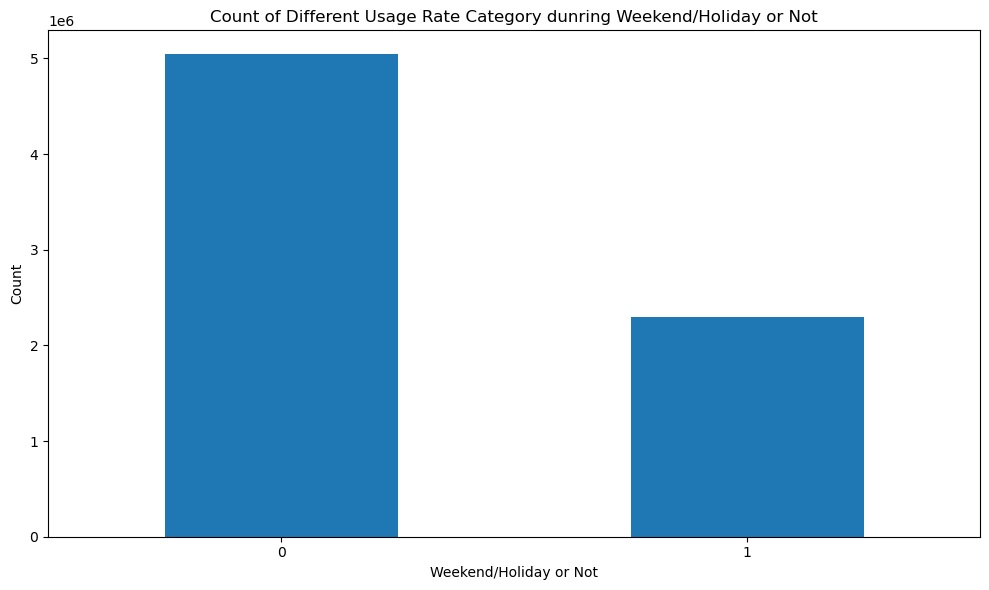

In [27]:
# Create a bar plot for the count of each unique value in 'is_weekend_or_holiday' column
plt.figure(figsize=(10, 6))
df_modified['is_weekend_or_holiday'].value_counts().plot(kind='bar')
plt.xlabel('Weekend/Holiday or Not')
plt.ylabel('Count')
plt.title('Count of Different Usage Rate Category dunring Weekend/Holiday or Not')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

The bar plot visually represents the distribution of recorded dates, indicating whether they fall on a weekend/holiday or not. 69% of the recorded dates are not on weekends/holidays, while 31% are.

In [28]:
# Check values of usage rate category during weekend/holiday
df_modified[df_modified['is_weekend_or_holiday'] == 1]['usage_rate_category'].value_counts()

usage_rate_category
Median    1620939
High       406865
Low        267586
Name: count, dtype: int64

In [29]:
# Get the percentage of each unique value in 'usage_rate_category' column during weekend/holiday
(df_modified[df_modified['is_weekend_or_holiday'] == 1]['usage_rate_category'].value_counts()/len(df_modified[df_modified['is_weekend_or_holiday'] == 1])) * 100

usage_rate_category
Median    70.61715
High      17.72531
Low       11.65754
Name: count, dtype: float64

In [30]:
# Check values of usage rate category during not weekend/holiday
df_modified[df_modified['is_weekend_or_holiday'] == 0]['usage_rate_category'].value_counts()

usage_rate_category
Median    3307912
High      1059078
Low        674814
Name: count, dtype: int64

In [31]:
# Get the percentage of each unique value in 'usage_rate_category' column during not weekend/holiday
(df_modified[df_modified['is_weekend_or_holiday'] == 0]['usage_rate_category'].value_counts()/len(df_modified[df_modified['is_weekend_or_holiday'] == 0])) * 100

usage_rate_category
Median    65.609690
High      21.005934
Low       13.384376
Name: count, dtype: float64

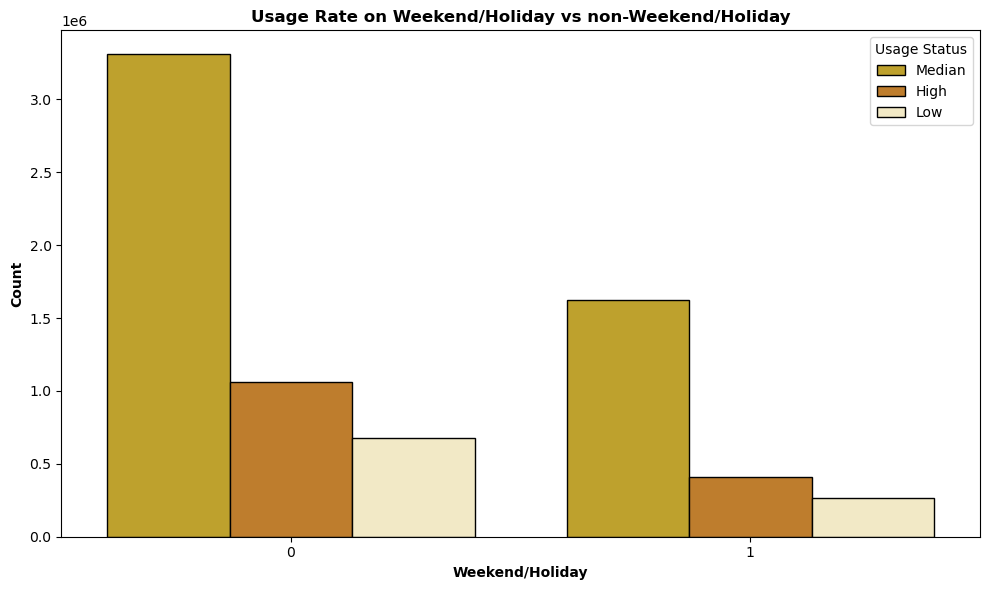

In [32]:
# Define the custom color palette to match the pie chart and histogram colors
color = ['#d6af15', '#d67f15', '#f9edbf']

# Countplot per grade with matching colors and dock_order
plt.figure(figsize=(10, 6))
sns.countplot(data=df_modified, x='is_weekend_or_holiday', hue='usage_rate_category', palette=color,
              edgecolor='black')

plt.xlabel('Weekend/Holiday', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Usage Rate on Weekend/Holiday vs non-Weekend/Holiday', fontweight='bold')
plt.legend(title='Usage Status', loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

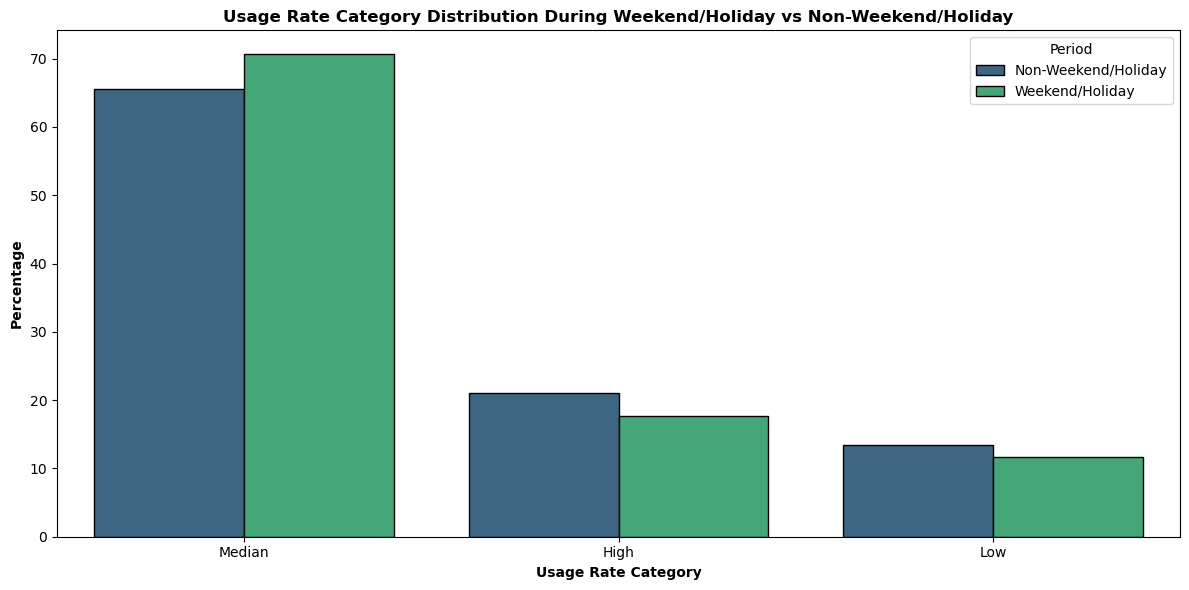

<Figure size 640x480 with 0 Axes>

In [33]:
# Define the custom color palette to match the pie chart and histogram colors
color = ['#d6af15', '#d67f15', '#f9edbf']

# Countplot per grade with matching colors and dock_order
plt.figure(figsize=(10, 6))

# Calculate percentages
non_weekend_holiday = df_modified[df_modified['is_weekend_or_holiday'] == 0]['usage_rate_category'].value_counts(normalize=True) * 100
weekend_holiday = df_modified[df_modified['is_weekend_or_holiday'] == 1]['usage_rate_category'].value_counts(normalize=True) * 100

# Create percentage dataFrame for plotting
percentage_df = pd.DataFrame({
    'usage_rate_category': non_weekend_holiday.index.append(weekend_holiday.index),
    'percentage': non_weekend_holiday.values.tolist() + weekend_holiday.values.tolist(),
    'period': ['Non-Weekend/Holiday'] * len(non_weekend_holiday) + ['Weekend/Holiday'] * len(weekend_holiday)
})

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_df, x='usage_rate_category', y='percentage', hue='period', palette='viridis', edgecolor='black')
plt.xlabel('Usage Rate Category', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Usage Rate Category Distribution During Weekend/Holiday vs Non-Weekend/Holiday', fontweight='bold')
plt.legend(title='Period', loc='upper right')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

**Observation:**

According to the plot, non-weekend/holiday periods exhibit a higher percentage of high usage rates (21%) compared to weekend/holiday periods (17%). Additionally, non-weekend/holiday periods show a higher percentage of low usage rates (13%) compared to weekend/holiday periods (11%). Conversely, weekend/holiday periods have a higher percentage of median usage rates (70%) compared to non-weekend/holiday periods (65%).

Now, let's extract the hour from 'time' column. 

In [34]:
# Extract the hour from the datetime column
df_modified['hour'] = df_modified['time'].dt.hour

In [35]:
# Look at random 10 rows
df_modified.sample(10)

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,...,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code,usage_rate,usage_rate_category,weekend,holiday,is_weekend_or_holiday,hour
4862140,2014-08-27 02:30:00,62,1,18,19,2014-08-27,68.0,57.0,69.0,30.04,...,9.0,0,1.0,94107,94.736842,High,0,0,0,2
2606786,2014-08-05 16:50:00,32,6,5,11,2014-08-05,71.0,58.0,69.0,30.04,...,6.0,0,4.0,94041,45.454545,Median,0,0,0,16
5373680,2014-10-18 03:25:00,41,6,9,15,2014-10-18,65.0,54.0,64.0,29.94,...,6.0,0,2.0,94107,60.000000,Median,1,0,1,3
423303,2014-07-31 23:10:00,16,6,9,15,2014-07-31,71.0,59.0,74.0,29.94,...,6.0,0,4.0,95113,60.000000,Median,0,0,0,23
4079447,2014-06-10 22:15:00,68,11,8,19,2014-06-10,63.0,54.0,73.0,29.78,...,10.0,0,4.0,94107,42.105263,Median,0,0,0,22
2245753,2015-02-07 03:25:00,25,2,13,15,2015-02-07,62.0,58.0,85.0,30.02,...,9.0,0,6.0,94063,86.666667,High,1,0,1,3
2215580,2015-01-23 09:00:00,25,4,11,15,2015-01-23,52.0,43.0,77.0,30.32,...,1.0,0,0.0,94063,73.333333,High,0,0,0,9
6548747,2015-02-11 05:40:00,65,2,13,15,2015-02-11,53.0,46.0,78.0,30.15,...,3.0,0,4.0,94107,86.666667,High,0,0,0,5
4391010,2014-07-11 05:55:00,69,17,6,23,2014-07-11,67.0,54.0,69.0,30.01,...,13.0,0,5.0,94107,26.086957,Low,0,0,0,5
3170996,2014-05-18 02:35:00,37,5,6,11,2014-05-18,66.0,52.0,61.0,29.99,...,12.0,0,4.0,94301,54.545455,Median,1,0,1,2


According to the output, we can confirm that the 'hour' columns is correctly extracted from 'time' column.

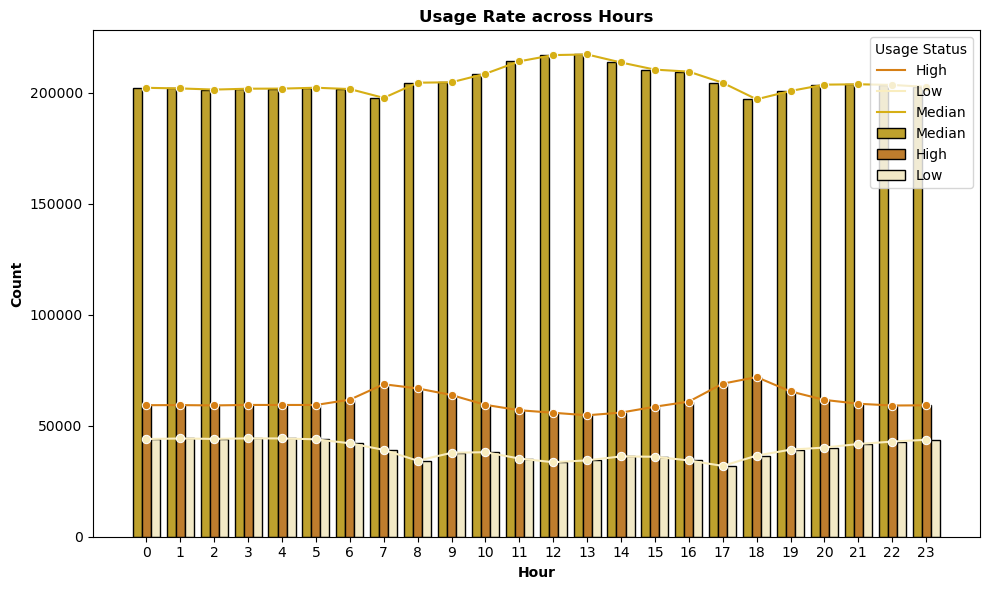

In [36]:
# Define the custom color palette to match the pie chart and histogram colors
color = ['#d6af15', '#d67f15', '#f9edbf']
line_color = ['#d67f15', '#f9edbf', '#d6af15']

# Countplot per grade with matching colors and dock_order
plt.figure(figsize=(10, 6))
sns.countplot(data=df_modified, x='hour', hue='usage_rate_category', palette=color,
              edgecolor='black')

# Group by hour and usage_rate_category to get counts
hourly_counts = df_modified.groupby(['hour', 'usage_rate_category']).size().reset_index(name='counts')

# Add trend line using lineplot
sns.lineplot(data=hourly_counts, x='hour', y='counts', hue='usage_rate_category', palette=line_color, marker='o')

plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Usage Rate across Hours', fontweight='bold')
plt.legend(title='Usage Status', loc='upper right')

plt.tight_layout()
plt.show()

**Observation:**

According to the plot, the hours between 7 - 9 AM and 5 - 7 PM show higher bike usage rates during the day.


**Methodology:**

We defined functions to categorize recorded dates as either weekend/holiday or non-weekend/holiday. Additionally, we analyzed how each usage rate category is influenced by these distinctions. Furthermore, we extracted hour information to observe how each usage rate category varies throughout the day.

**Findings:**

Based on the analysis of how weekends/holidays and hours may influence usage rates, we can make the following assumptions:

1. Commuter Influence: The higher percentage of high bike usage rates during non-weekend/holiday periods (21% vs. 17%) suggests that bike sharing is more frequently used for commuting purposes on weekdays. This assumption is further supported by the increased usage rates during peak commuting hours (7 - 9 AM and 5 - 7 PM).

2. Leisure and Casual Use: The higher percentage of median usage rates during weekend/holiday periods (70% vs. 65%) indicates that bike sharing is more evenly distributed throughout the day on weekends and holidays, likely due to leisure and casual use rather than commuting.

3. Low Demand Times: The higher percentage of low usage rates during non-weekend/holiday periods (13% vs. 11%) suggest that there are periods during the workday when bike usage drops, possibly due to people being at work or home.

Overall, these patterns imply that bike sharing usage is heavily influenced by work and commuting schedules during the weekdays, while weekends and holidays see more consistent but moderate usage patterns, likely driven by recreational activities.

#### Detecting Collinearity

Let's look at the correlation and explore collinearity in our dataset.

In [37]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337194 entries, 0 to 7337193
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   station_id                      int64         
 2   bikes_available                 int64         
 3   docks_available                 int64         
 4   dock_count                      int64         
 5   date                            datetime64[ns]
 6   mean_temperature_f              float64       
 7   mean_dew_point_f                float64       
 8   mean_humidity                   float64       
 9   mean_sea_level_pressure_inches  float64       
 10  mean_visibility_miles           float64       
 11  mean_wind_speed_mph             float64       
 12  precipitation_inches            int64         
 13  cloud_cover                     float64       
 14  zip_code                        int64         
 15

In [38]:
# Checking the correlation among columns
df_modified.select_dtypes(include=['number', 'datetime']).corr()

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code,usage_rate,weekend,holiday,is_weekend_or_holiday,hour
time,1.000000,0.000266,-0.022141,0.020371,0.000052,0.999996,-0.581354,-0.407218,0.125994,0.407968,-0.234657,-0.287541,0.119756,0.025685,-0.000170,0.029253,-0.006185,-0.000424,-0.006174,0.002694
station_id,0.000266,1.000000,0.088507,0.130960,0.240186,0.000266,-0.099119,0.041209,0.135413,0.004335,-0.053069,0.227549,0.067174,0.174019,-0.565970,0.018930,-0.000353,0.000060,-0.000323,0.000010
bikes_available,-0.022141,0.088507,1.000000,-0.539947,0.468205,-0.022103,-0.012698,0.010491,0.023796,-0.004713,-0.029749,0.040047,0.034619,0.045892,-0.040046,-0.862922,0.016418,0.001889,0.016657,-0.013874
docks_available,0.020371,0.130960,-0.539947,1.000000,0.487991,0.020337,-0.030538,-0.010590,0.025666,0.005097,-0.024517,0.043292,0.011827,0.032623,-0.125506,0.849579,-0.014537,-0.001239,-0.014596,0.012713
dock_count,0.000052,0.240186,0.468205,0.487991,1.000000,0.000052,-0.046707,-0.000437,0.048913,0.001100,-0.056324,0.094605,0.050823,0.085198,-0.172166,-0.005469,-0.000072,0.000022,-0.000062,0.000022
date,0.999996,0.000266,-0.022103,0.020337,0.000052,1.000000,-0.581357,-0.407221,0.125994,0.407971,-0.234657,-0.287543,0.119753,0.025684,-0.000170,0.029216,-0.006186,-0.000424,-0.006175,-0.000041
mean_temperature_f,-0.581354,-0.099119,-0.012698,-0.030538,-0.046707,-0.581357,1.000000,0.651168,-0.252421,-0.550511,0.315224,0.226964,-0.119912,-0.101560,0.082113,-0.014773,-0.004722,-0.050034,-0.022239,0.000297
mean_dew_point_f,-0.407218,0.041209,0.010491,-0.010590,-0.000437,-0.407221,0.651168,1.000000,0.505037,-0.483535,0.005533,0.189277,0.148476,0.328432,-0.075437,-0.015211,0.022433,-0.097429,-0.012499,0.000313
mean_humidity,0.125994,0.135413,0.023796,0.025666,0.048913,0.125994,-0.252421,0.505037,1.000000,-0.024899,-0.430283,-0.063324,0.331855,0.542628,-0.202254,0.006200,0.051479,-0.067908,0.026199,0.000101
mean_sea_level_pressure_inches,0.407968,0.004335,-0.004713,0.005097,0.001100,0.407971,-0.550511,-0.483535,-0.024899,1.000000,-0.129369,-0.386740,-0.045133,-0.124197,-0.026753,0.008622,-0.013976,0.006761,-0.011229,-0.000567


Let's visualize the correlation coefficients between various features and the target variable 'usage_rate' in the dataset.

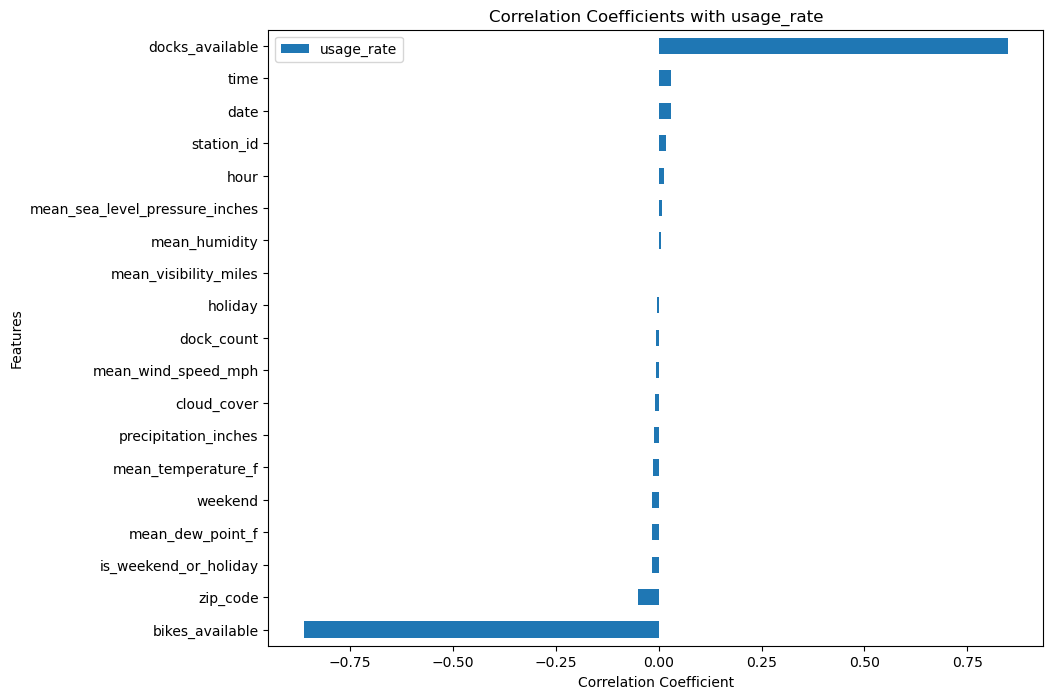

In [39]:
# Extract the correlation coefficients between 'usage_rate' and other features from the correlation matrix and sort these coefficients in ascending order.
corr_df = df_modified.select_dtypes(include=['number', 'datetime']).corr()
df_modified_correlation = corr_df['usage_rate'].drop(['usage_rate']).sort_values(ascending=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot a horizontal bar chart to visualize the strength and direction of correlation for each feature with 'usage_rate'
df_modified_correlation.plot(kind='barh', legend=True)
plt.title('Correlation Coefficients with usage_rate')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show the plot
plt.show()

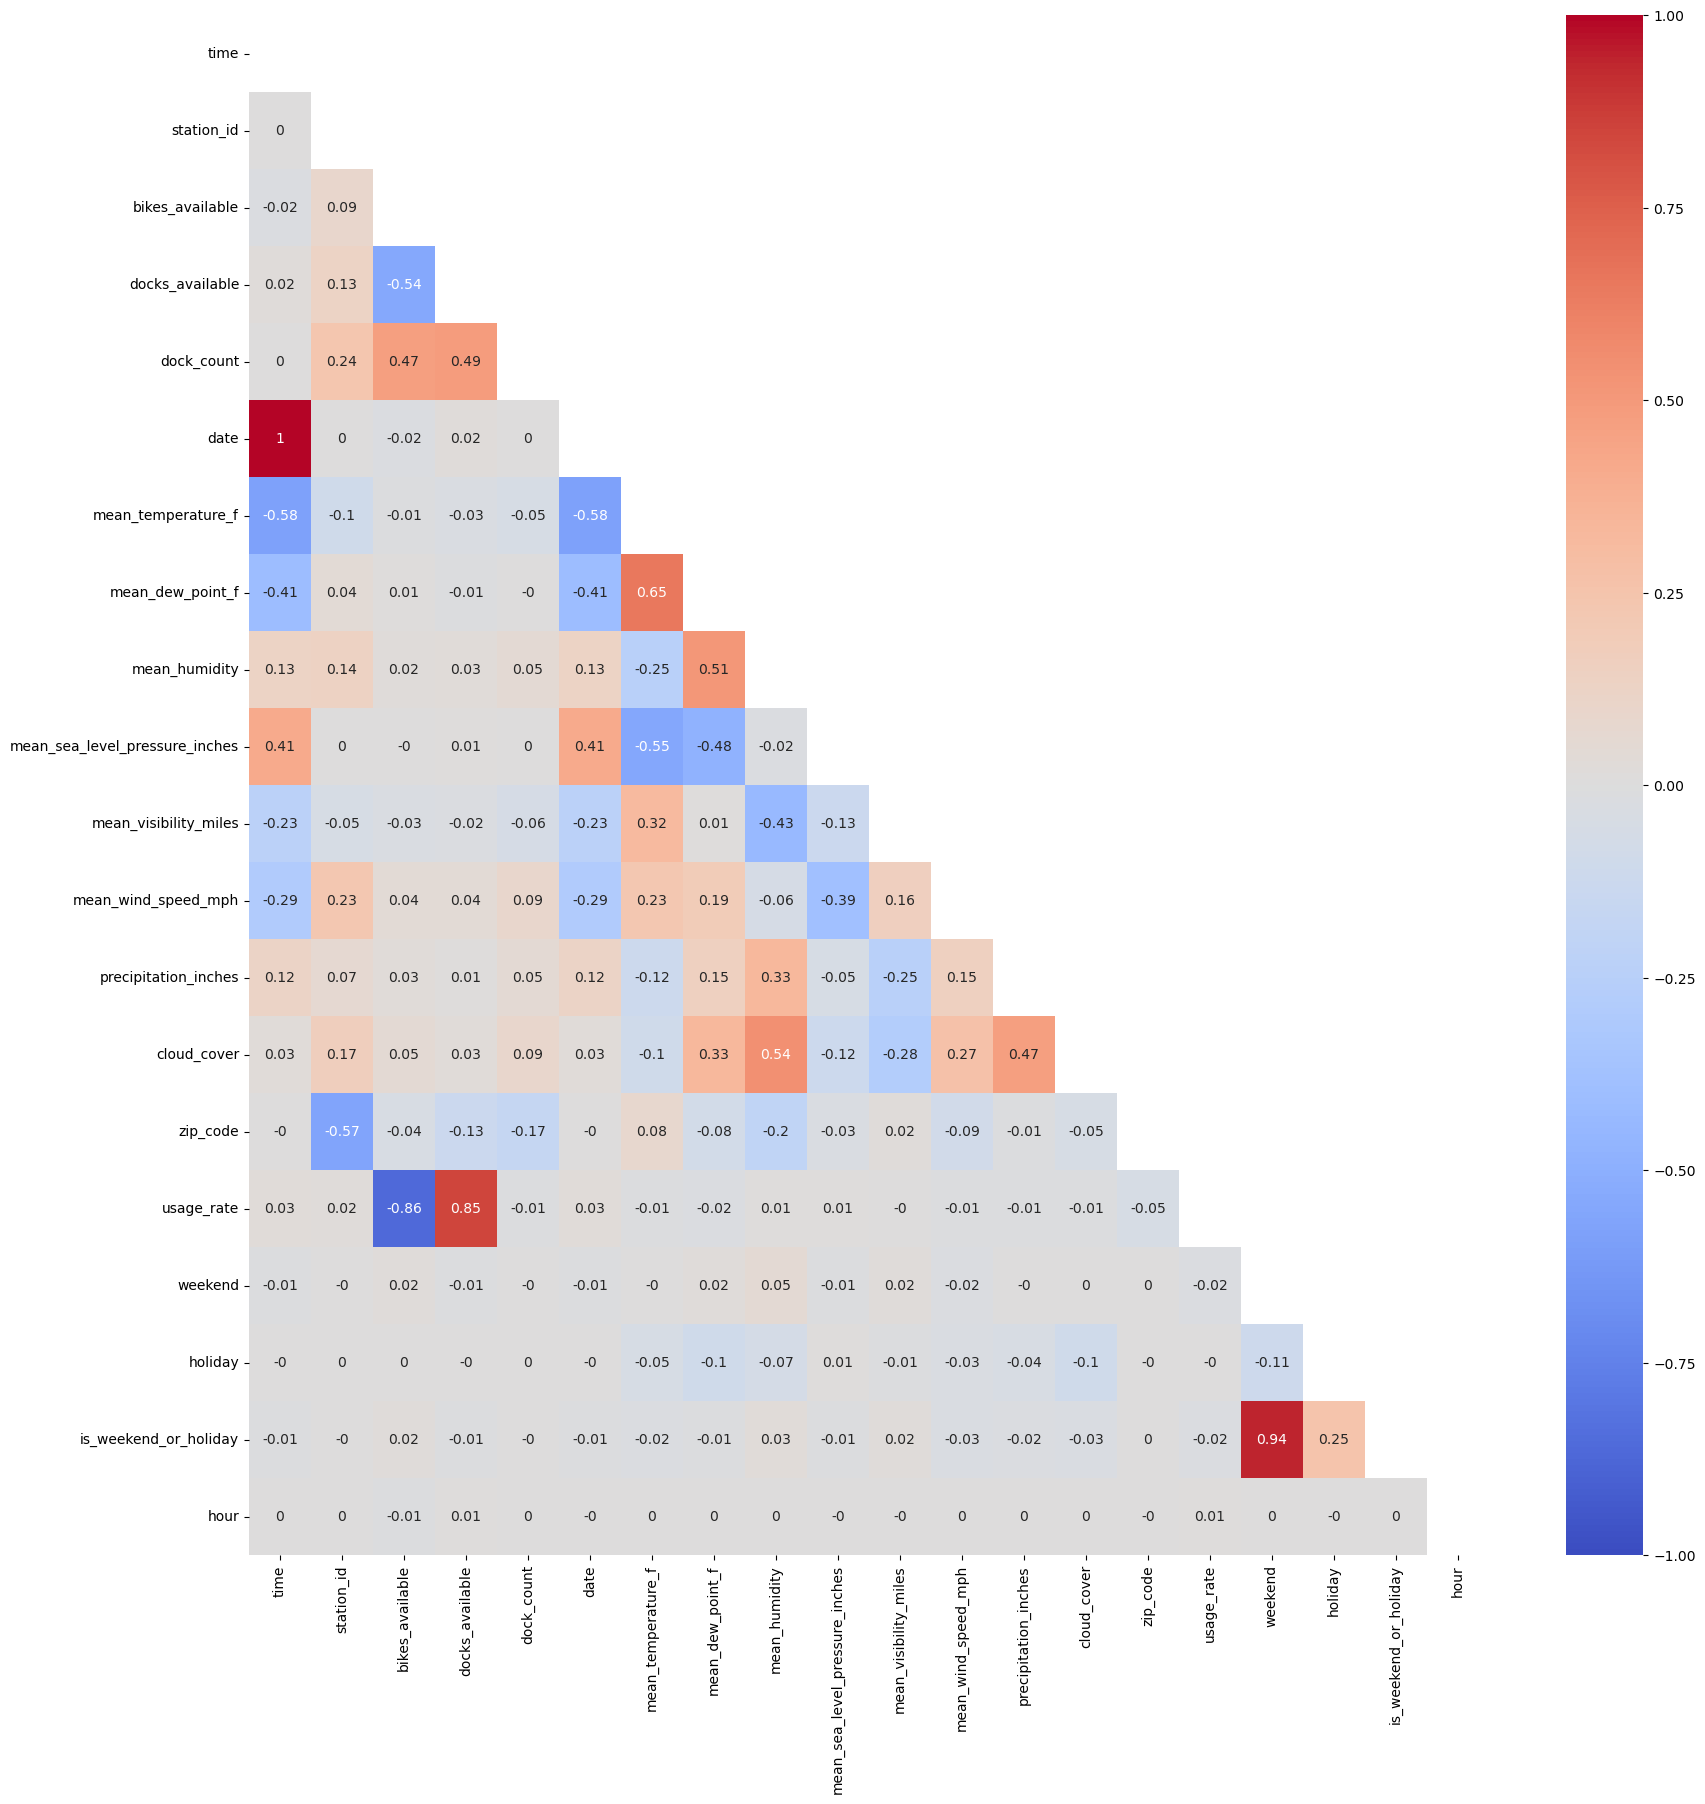

In [40]:
# We can also use heat map to look into the correlation with the number of mosquitoes caught between features
corr_df = df_modified.select_dtypes(include=['number', 'datetime']).corr()

# mask for upper-triangular
mask = np.triu(corr_df)

# visualise it using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

From the plot above, we observe that cloud cover is positively correlated with humidity levels, aligning with our common understanding. Additionally, the following columns require careful handling to avoid collinearity:

- 'time' is highly correlated with 'date'
- 'weekend' is highly correlated with 'is_weekend_or_holiday' 
- 'usage_rate' is highly correlated with 'docks_available' 
- 'usage_rate' is highly correlated with 'bikes_available' 
- 'mean_temperature_f' is correlated with 'time' 
- 'mean_temperature_f' is correlated with 'date' 
- 'mean_dew_point_f' is correlated with 'mean_temperature_f' 

To address correlations between features, we can remove one variable from each pair to avoid collinearity.

<Axes: xlabel='time', ylabel='date'>

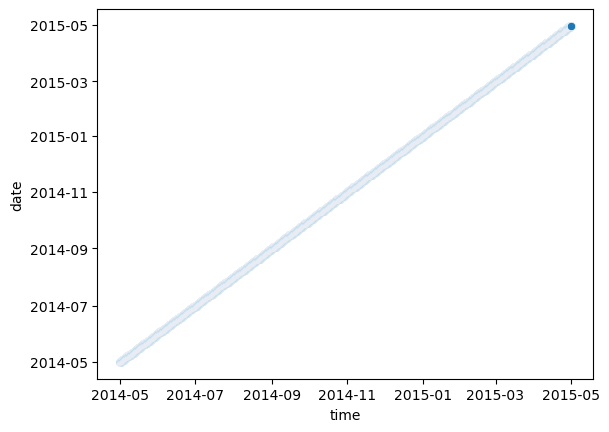

In [41]:
# Plottting a scatterplot between 'time' and 'date' columns
sns.scatterplot(x='time', y='date', data=df_modified)

It is not surprising to observe a high correlation between the 'date' and 'time' columns, as both store the same date information. Given that the 'time' column includes more comprehensive information, such as hour and minute, we will remove the 'date' column to avoid collinearity.

<Axes: xlabel='is_weekend_or_holiday', ylabel='weekend'>

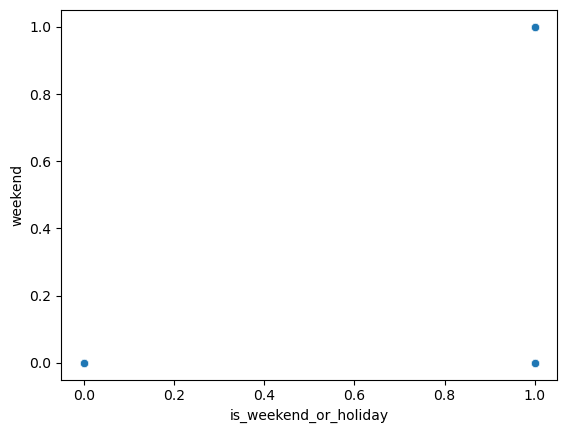

In [42]:
# Plottting a scatterplot between 'time' and 'date' columns
sns.scatterplot(x='is_weekend_or_holiday', y='weekend', data=df_modified)

The value of the 'is_weekend_or_holiday' column is determined by the values in the 'weekend' and 'holiday' columns, making it understandable that there is a high correlation between these columns. We will remove the 'is_weekend_or_holiday' column to avoid collinearity.

<Axes: xlabel='usage_rate', ylabel='docks_available'>

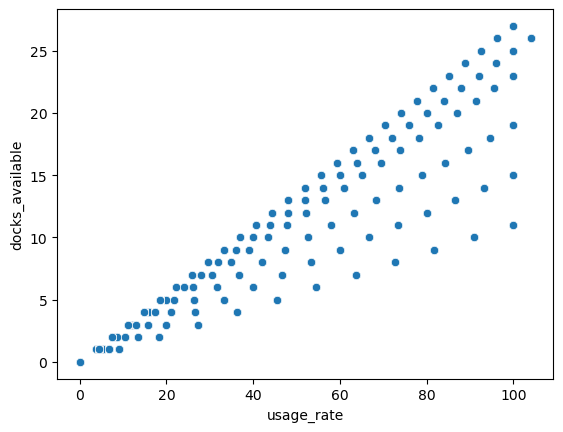

In [43]:
# Plottting a scatterplot between 'usage_rate' and 'docks_available' columns
sns.scatterplot(x='usage_rate', y='docks_available', data=df_modified)

<Axes: xlabel='usage_rate', ylabel='bikes_available'>

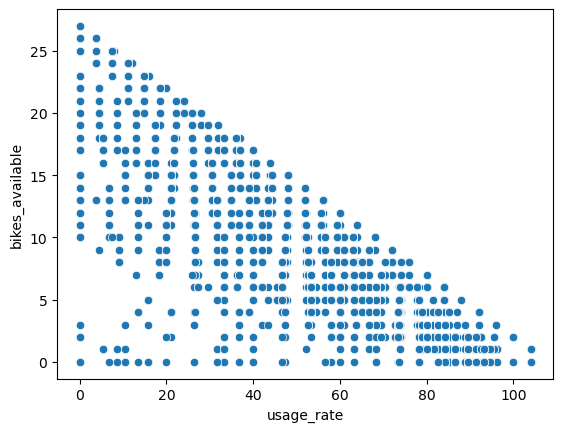

In [44]:
# Plottting a scatterplot between 'usage_rate' and 'bikes_available' columns
sns.scatterplot(x='usage_rate', y='bikes_available', data=df_modified)

The 'usage_rate' column was derived by dividing 'docks_available' by 'dock_count' in the DataFrame. Given that 'dock_count' is the sum of 'bikes_available' and 'docks_available', it is expected that 'usage_rate' and 'docks_available' would exhibit a high correlation. This also explains the high correlation between 'usage_rate' and 'bikes_available'.

To avoid collinearity, we will remove the 'usage_rate' column since our target variable 'usage_rate_category' that needs to be predicted is based on this column.

<Axes: xlabel='mean_temperature_f', ylabel='time'>

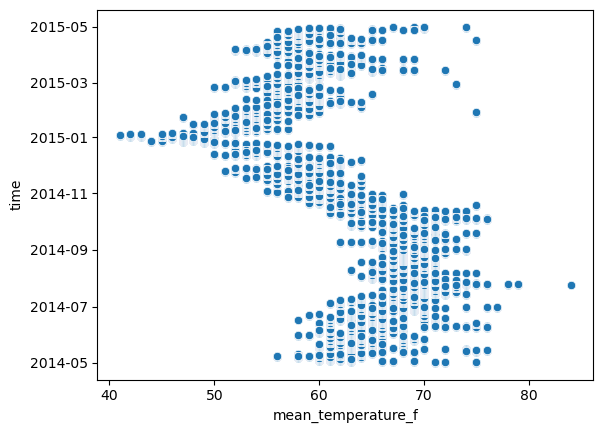

In [45]:
# Plottting a scatterplot between 'mean_temperature_f' and 'time' columns
sns.scatterplot(x='mean_temperature_f', y='time', data=df_modified)

<Axes: xlabel='mean_temperature_f', ylabel='date'>

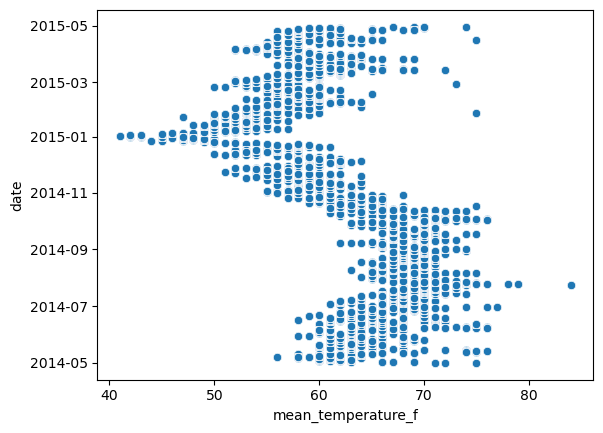

In [46]:
# Plottting a scatterplot between 'mean_temperature_f' and 'date' columns
sns.scatterplot(x='mean_temperature_f', y='date', data=df_modified)

Given that the 'date' and 'time' columns essentially contain the same date information, so that their graphs are exactly identical. These graphs show that the 'mean_temperature_f' column is highly correlated with date/time columns.

<Axes: xlabel='mean_dew_point_f', ylabel='mean_temperature_f'>

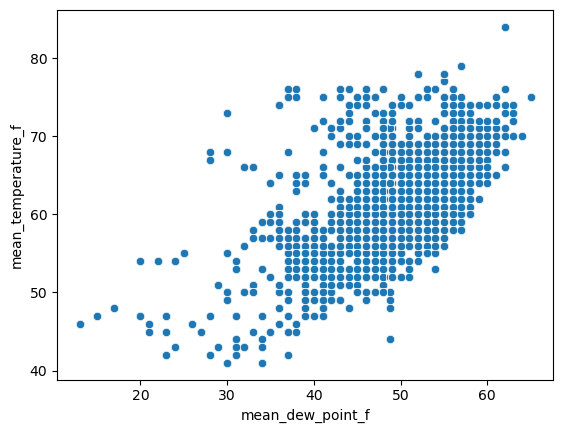

In [47]:
# Plottting a scatterplot between 'mean_dew_point_f' and 'mean_temperature_f' columns
sns.scatterplot(x='mean_dew_point_f', y='mean_temperature_f', data=df_modified)

The scatter plot shows that there is correlation between mean_dew_point_f and mean_temperature_f.

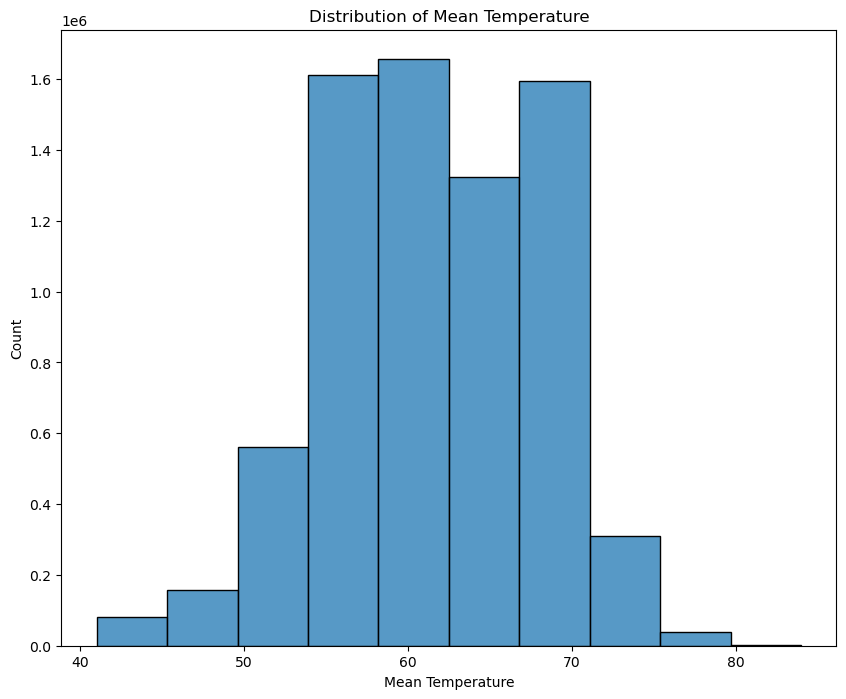

In [48]:
# Plot a histogram of mean_temperature_f
plt.figure(figsize=(10, 8))
sns.histplot(df_modified['mean_temperature_f'], bins=10)
plt.xlabel('Mean Temperature')
plt.ylabel('Count')
plt.title('Distribution of Mean Temperature')
plt.show()

According to the plot, the distribution of mean temperatures is highly concentrated around 55–70 degrees throughout the year, with minimal variation. 
We will remove the 'mean_temperature_f' feature to avoid collinearity.

Let's drop 'date','is_weekend_or_holiday', 'usage_rate','mean_temperature_f' columns to avoid avoid collinearity.

In [49]:
# Make a copy of df_modified
df_clean = df_modified.copy()

In [50]:
# Drop 'date','is_weekend_or_holiday', 'usage_rate','mean_temperature_f'
df_clean = df_clean.drop(['date','is_weekend_or_holiday', 'usage_rate', 'mean_temperature_f'], axis=1)

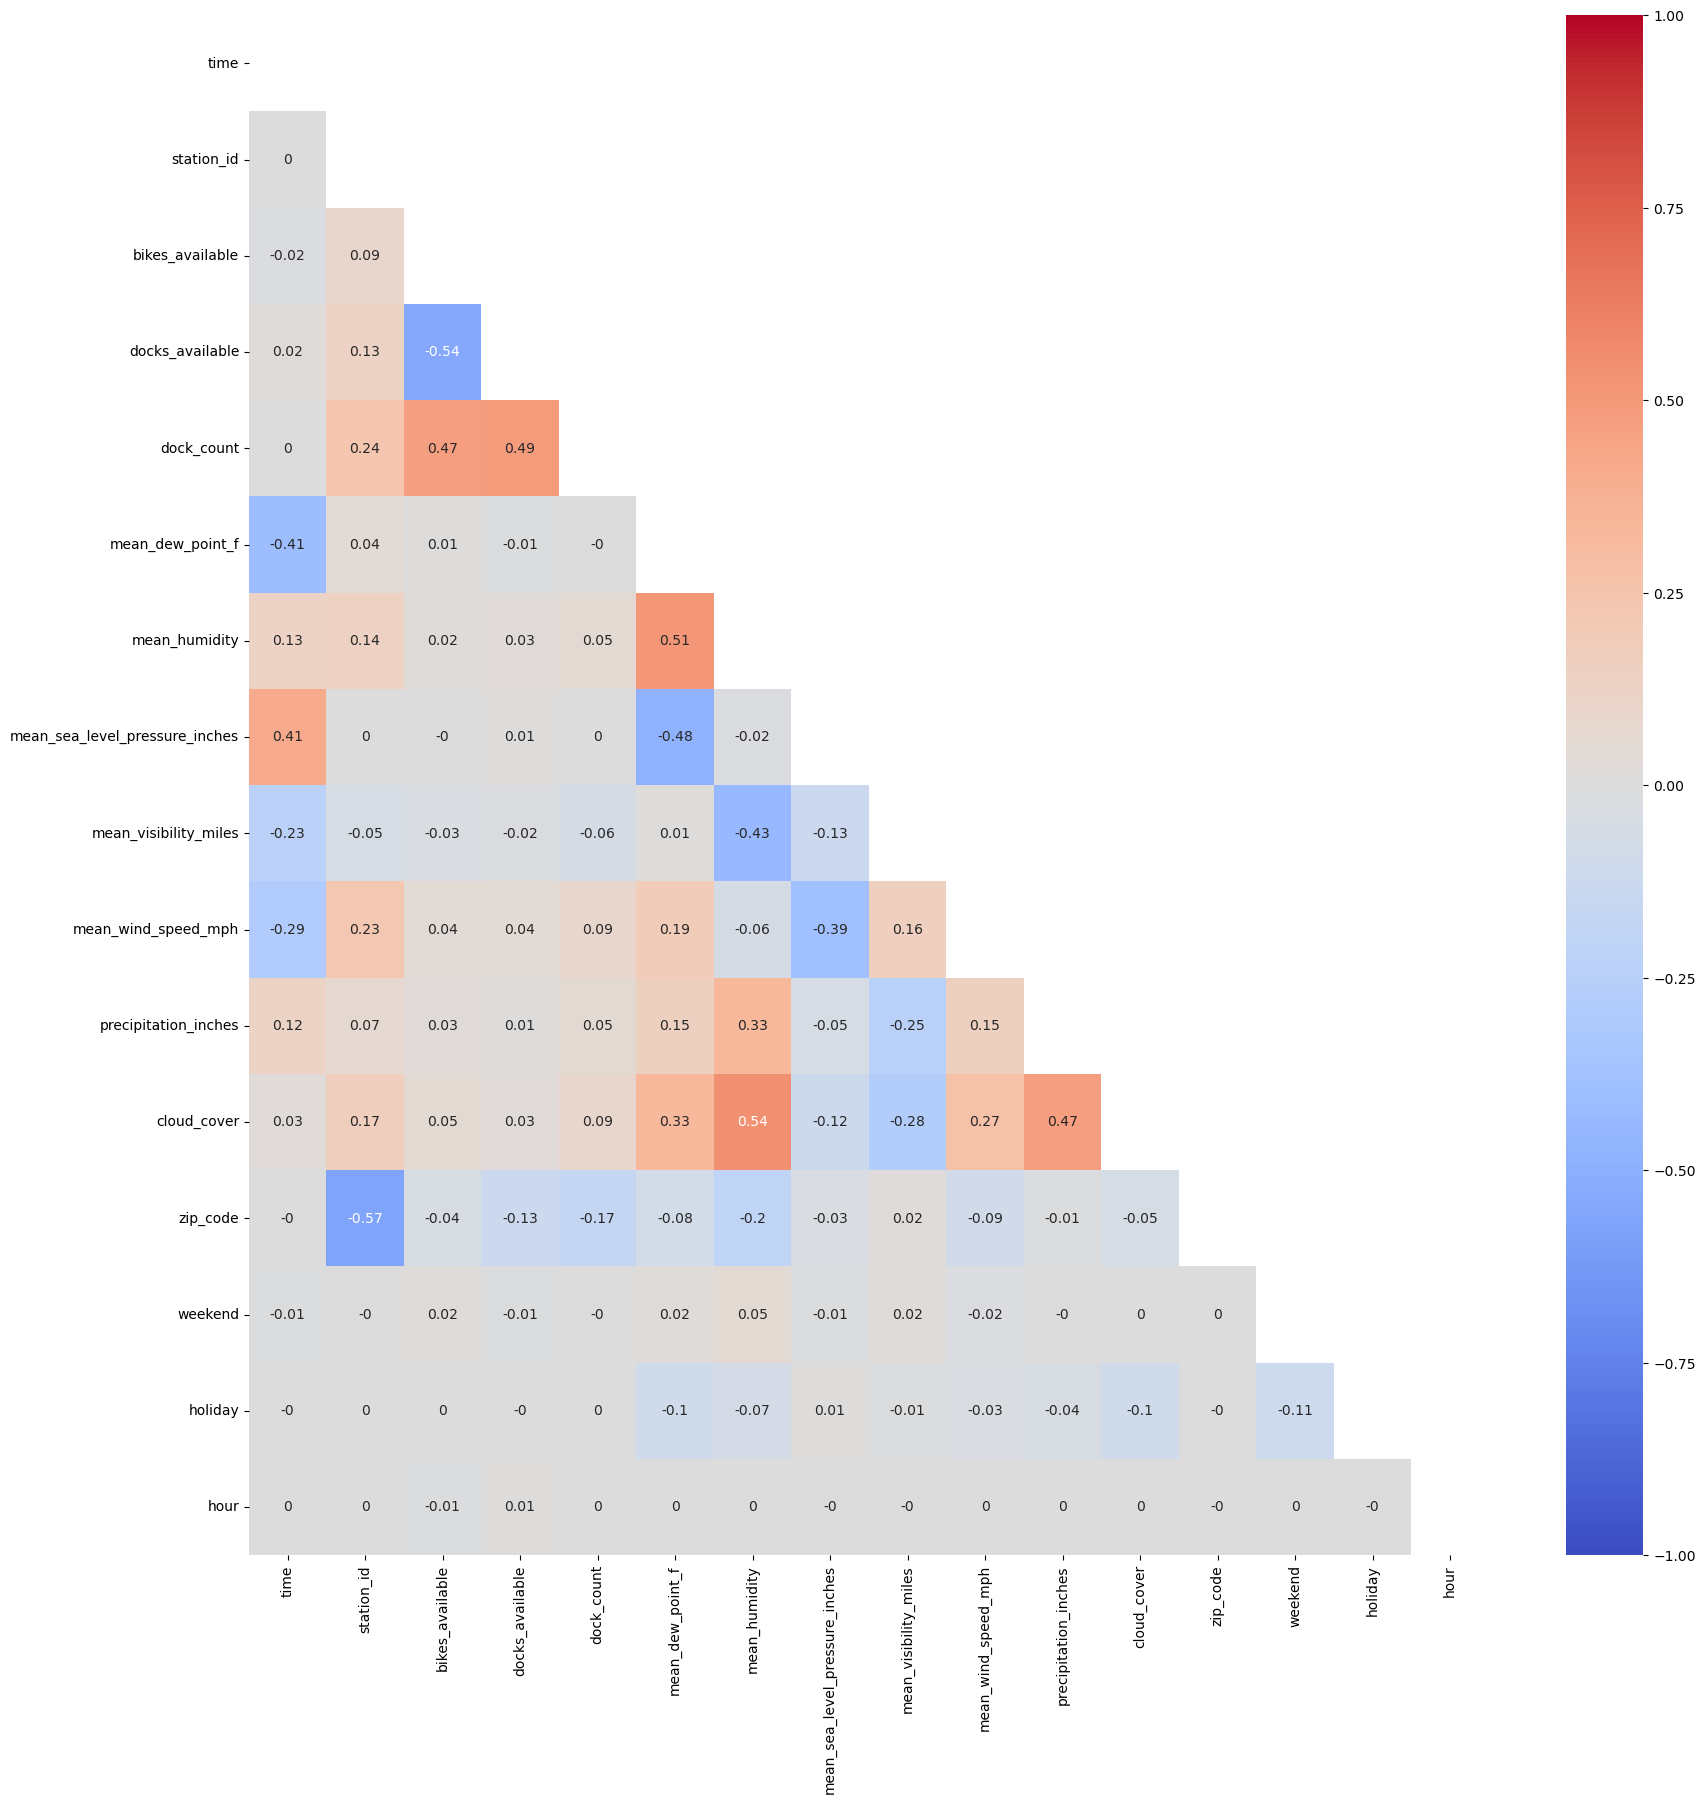

In [51]:
# We can also use heat map to look into the correlation with the number of mosquitoes caught between features
corr_df = df_clean.select_dtypes(include=['number', 'datetime']).corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualise it using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

#### Detecting Multicollinearity

Let's explore multicollinearity in our dataset by calculating the Variance Inflation Factor (VIF).

In [52]:
# Add a constant to the data because the VIF calculation requires it
X_withconst = sm.add_constant(df_clean.select_dtypes(include=['number']))

pd.Series([variance_inflation_factor(X_withconst.values.astype(float), i) 
           for i in range(X_withconst.shape[1])],
          index=X_withconst.columns)[1:]

station_id                          1.663806
bikes_available                   181.350788
docks_available                   185.904339
dock_count                        169.554118
mean_dew_point_f                    2.059265
mean_humidity                       2.523687
mean_sea_level_pressure_inches      1.593319
mean_visibility_miles               1.402128
mean_wind_speed_mph                 1.468445
precipitation_inches                1.327042
cloud_cover                         1.888169
zip_code                            1.587945
weekend                             1.019804
holiday                             1.029758
hour                                1.000422
dtype: float64

**Finding:**

A Variance Inflation Factor (VIF) score above 5 indicates multicollinearity. Based on these VIF scores, it is evident that the columns 'bikes_available', 'docks_available', and 'dock_count' exhibit extremely high multicollinearity, with VIF scores well above the common threshold of 5.

To mitigate multicollinearity, we will drop the 'docks_available' column, which has the highest VIF score.
Additionally, since we are building models to predict usage rate, we will also drop the 'bikes_available' column, as it is used to calculate the usage rate.

In [53]:
# Drop 'docks_available' and 'bikes_available'
df_clean = df_clean.drop(['docks_available', 'bikes_available'], axis=1)
df_clean.head()

,time,station_id,dock_count,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code,usage_rate_category,weekend,holiday,hour
0,2014-05-01 00:00:00,2,27,45.0,41.0,30.06,10.0,6.0,0,3.0,95113,Median,0,0,0
1,2014-05-01 00:05:00,2,27,45.0,41.0,30.06,10.0,6.0,0,3.0,95113,Median,0,0,0
2,2014-05-01 00:10:00,2,27,45.0,41.0,30.06,10.0,6.0,0,3.0,95113,Median,0,0,0
3,2014-05-01 00:15:00,2,27,45.0,41.0,30.06,10.0,6.0,0,3.0,95113,Median,0,0,0
4,2014-05-01 00:20:00,2,27,45.0,41.0,30.06,10.0,6.0,0,3.0,95113,Median,0,0,0


In [54]:
# Calculate the Variance Inflation Factor (VIF) after dropping 'docks_available'
X_withconst = sm.add_constant(df_clean.select_dtypes(include=['number']))

pd.Series([variance_inflation_factor(X_withconst.values.astype(float), i) 
           for i in range(X_withconst.shape[1])],
          index=X_withconst.columns)[1:]

station_id                        1.623382
dock_count                        1.070545
mean_dew_point_f                  2.057165
mean_humidity                     2.518416
mean_sea_level_pressure_inches    1.590112
mean_visibility_miles             1.401933
mean_wind_speed_mph               1.463650
precipitation_inches              1.326521
cloud_cover                       1.887906
zip_code                          1.569652
weekend                           1.019096
holiday                           1.029674
hour                              1.000002
dtype: float64

**Finding:**

Now, all of our columns have acceptable VIF scores (< 5), indicating low multicollinearity among them.

In [55]:
# Save the data to a parquet file
df_clean.to_parquet('data/BikeData_after_EDA.parquet')